In [7]:
pip install mplsoccer

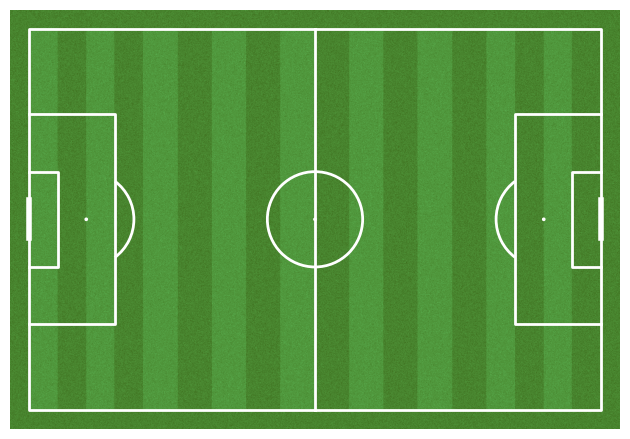

In [56]:
from mplsoccer.pitch import Pitch
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

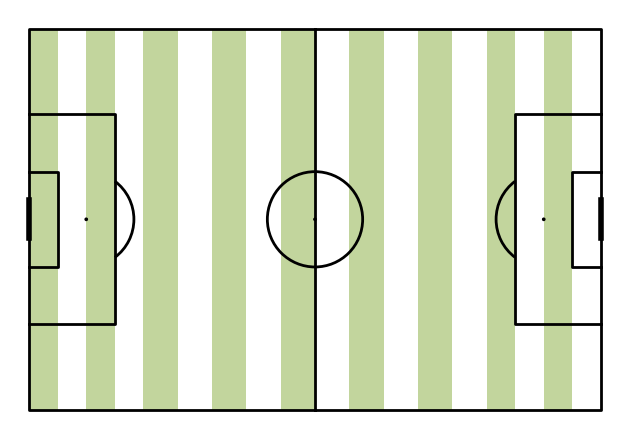

In [58]:
from mplsoccer.pitch import Pitch
pitch = Pitch(pitch_type='statsbomb', line_color='black', stripe=True)
fig, ax = pitch.draw()

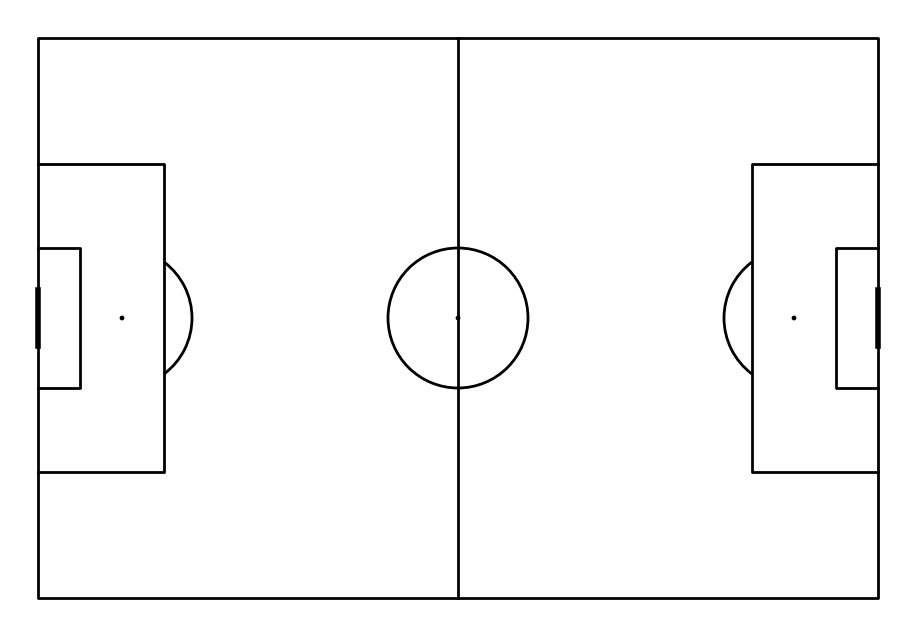

In [61]:
# Create a matplotlib figure with desired size
fig, ax = plt.subplots(figsize=(12, 8))

# Create the Pitch object and draw the pitch on the specified figure and axis
pitch = Pitch(pitch_type='statsbomb', line_color='black')
pitch.draw(ax=ax)

# Add your soccer elements here (e.g., scatter, lines, text, etc.)

plt.show()  # This displays the plot in the notebook

# Save the figure as a PNG file with specified DPI
fig.savefig('soccer_pitch.png', dpi=300)  # Adjust filename and DPI as needed


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch,VerticalPitch
import seaborn as sns
import os
import requests
from bs4 import BeautifulSoup
import json
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [10]:
url=input("enter the url:" " ")

enter the url:  https://1xbet.whoscored.com/Matches/1809767/Live/Europe-Europa-League-2023-2024-Liverpool-Atalanta


In [11]:
response = requests.get(
    url,
    headers={'User-Agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"} # you'll be blocked if you don't use some type of user agent
)

In [12]:
response.status_code

200

In [13]:
soup=BeautifulSoup(response.content,"lxml")
scripts=soup.find_all("script")

In [14]:
scripts

[<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"47235c2cb5","applicationID":"1020190497","transactionName":"MVBVZhMHDEcCV0BdCwgadmExSRRdBkNHGwkHQVRaBBVNWQJAV1wHA1tDQARIA0cTTA==","queueTime":0,"applicationTime":444,"agent":"","atts":""}</script>,
 <script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"47235c2cb5",applicationID:"1020190497"};;/*! For license information please see nr-loader-rum-1.257.0.min.js.LICENSE.txt */
 (()=>{var e,t,r={234:(e,t,r)=>{"use strict";r.d(t,{P_:()=>v,Mt:()=>b,C5:()=>s,OP:()=>S,lF:()=>N,Yu:()=>_,Dg:()=>m,CX:()=>c,GE:()=>w,sU:()=>k});var n=r(8632),i=r(9567);const o={beacon:n.ce.beacon,errorBeacon:n.ce.errorBeacon,licenseKey:void 0,applicationID:void 0,sa:void 0,queueTime:void 0,applicationTime:void 0,ttGuid:void 0,user:void 0,account:void 0,product:void 0,extra:v

In [16]:
strings=scripts[22].string
strings

'\r\n        require.config.params["args"] = {\r\n            matchId:1809767,\r\n            matchCentreData: {"playerIdNameDictionary":{"345319":"Alexis Mac Allister","377168":"Luis Díaz","108226":"Mohamed Salah","345957":"Ibrahima Konaté","301455":"Kostas Tsimikas","369875":"Dominik Szoboszlai","322176":"Caoimhín Kelleher","86829":"Wataru Endo","95408":"Virgil van Dijk","363884":"Ryan Gravenberch","352825":"Cody Gakpo","235755":"Diogo Jota","444540":"Stefan Bajcetic","73399":"Adrián","400828":"Darwin Núñez","430019":"Jarell Quansah","450021":"Bobby Clark","136451":"Joe Gomez","318871":"Trent Alexander-Arnold","363982":"Harvey Elliott","355354":"Curtis Jones","115726":"Andy Robertson","424945":"Conor Bradley","100962":"Berat Djimsiti","126278":"Juan Musso","386390":"Charles De Ketelaere","362556":"Éderson","129903":"Mario Pasalic","356176":"Michel Adopo","64075":"Rafael Tolói","78693":"Francesco Rossi","141312":"Davide Zappacosta","302650":"Gianluca Scamacca","383278":"Marco Carnesec

In [17]:
ind_start=strings.index("matchCentreData:")+17
ind_end=strings.index(",\r\n            matchCentreEventTypeJson")

In [18]:
jason_data=strings[ind_start:ind_end]

In [19]:
data=json.loads(jason_data)

In [20]:
events=data["events"]

In [21]:
df=pd.DataFrame(events)

In [22]:
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,endY,relatedEventId,relatedPlayerId,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,cardType,isGoal
0,2.670940e+09,2,0,0.0,26,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.670940e+09,2,0,0.0,300,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.670940e+09,3,0,0.0,300,49.8,49.8,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.670940e+09,4,0,3.0,300,31.8,50.7,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,84.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.670940e+09,3,0,6.0,26,25.4,13.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,2.670974e+09,1062,93,10.0,26,0.0,0.0,95,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601,2.670975e+09,701,0,0.0,300,0.0,0.0,5,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602,2.670975e+09,1063,0,0.0,26,0.0,0.0,5,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,2.670928e+09,1,0,0.0,26,0.0,0.0,0,"{'value': 16, 'displayName': 'PreMatch'}","{'value': 34, 'displayName': 'FormationSet'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.head()

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,endY,relatedEventId,relatedPlayerId,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,cardType,isGoal
0,2.670940e+09,2,0,0.0,26,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.670940e+09,2,0,0.0,300,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.670940e+09,3,0,0.0,300,49.8,49.8,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.670940e+09,4,0,3.0,300,31.8,50.7,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,84.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.670940e+09,3,0,6.0,26,25.4,13.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# create function for cleaning
def clean_data(x):
    x1=x.apply(lambda x:str(x))
    x2=x1.str.split(":",n=3,expand=True)[2]
    x3=x2.str.replace("[^a-zA-Z0-9]",'',regex=True)
    return x3

In [25]:
# for period ,type
df["period"]=clean_data(df["period"])
df["type"]=clean_data(df["type"])
df["outcomeType"]=clean_data(df["outcomeType"])

In [26]:
df1=df[["id","eventId","minute","second","teamId","x","y","endX","endY","period","type","outcomeType","playerId"]]

In [27]:
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,endY,relatedEventId,relatedPlayerId,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,cardType,isGoal
0,2.670940e+09,2,0,0.0,26,0.0,0.0,0,FirstHalf,Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.670940e+09,2,0,0.0,300,0.0,0.0,0,FirstHalf,Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.670940e+09,3,0,0.0,300,49.8,49.8,0,FirstHalf,Pass,...,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.670940e+09,4,0,3.0,300,31.8,50.7,0,FirstHalf,Pass,...,84.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.670940e+09,3,0,6.0,26,25.4,13.0,0,FirstHalf,Pass,...,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,2.670974e+09,1062,93,10.0,26,0.0,0.0,95,SecondHalf,End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601,2.670975e+09,701,0,0.0,300,0.0,0.0,5,PostGame,End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602,2.670975e+09,1063,0,0.0,26,0.0,0.0,5,PostGame,End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,2.670928e+09,1,0,0.0,26,0.0,0.0,0,PreMatch,FormationSet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Save the DataFrame to a CSV file
df.to_csv('atlanta-liverpool_3-0_passxy.csv', index=False)

In [31]:
# Create new columns for recipient
df["passer_ID"] = df["playerId"]
df["recipient_ID"] = df["playerId"].shift(-1)

In [32]:
df.head()

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,relatedPlayerId,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,cardType,isGoal,passer_ID,recipient_ID
0,2.670940e+09,2,0,0.0,26,0.0,0.0,0,FirstHalf,Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.670940e+09,2,0,0.0,300,0.0,0.0,0,FirstHalf,Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386390.0
2,2.670940e+09,3,0,0.0,300,49.8,49.8,0,FirstHalf,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386390.0,454908.0
3,2.670940e+09,4,0,3.0,300,31.8,50.7,0,FirstHalf,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,454908.0,345957.0
4,2.670940e+09,3,0,6.0,26,25.4,13.0,0,FirstHalf,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345957.0,363982.0


In [40]:
# Create a new data frame with selected columns
selected_columns = df[['passer_ID', 'recipient_ID']]
print(selected_columns)
# Save the selected columns to an Excel file
selected_columns.to_excel('pass-rec_liv-atl(0-3).xlsx', index=False)  # Save to Excel without index

      passer_ID  recipient_ID
0           NaN           NaN
1           NaN      386390.0
2      386390.0      454908.0
3      454908.0      345957.0
4      345957.0      363982.0
...         ...           ...
1600        NaN           NaN
1601        NaN           NaN
1602        NaN           NaN
1603        NaN           NaN
1604        NaN           NaN

[1605 rows x 2 columns]


In [38]:
#PLAYER NAME
player_df=data["playerIdNameDictionary"]
# Extract keys (player IDs) and values (player names)
player_ids = list(playerIdNameDictionary.keys())
player_names = list(playerIdNameDictionary.values())

# Create DataFrame
player_df = pd.DataFrame({'Player ID': player_ids, 'Player Name': player_names})

# Display the DataFrame
print(player_df)

NameError: name 'playerIdNameDictionary' is not defined

In [ ]:
df

In [41]:
import requests
from bs4 import BeautifulSoup

# Fetch the web page
url = 'https://1xbet.whoscored.com/Matches/1809767/Live/Europe-Europa-League-2023-2024-Liverpool-Atalanta'
response = requests.get(url)
html_content = response.content

# Parse HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table by class ID
table_class_id = 'team-players'  # Replace 'table-class-id' with the actual class ID of the table
table = soup.find('table', {'class': team-players})

# Check if the table was found
if table:
    # Extract data from the table
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        for cell in cells:
            print(cell.text)  # Print or process the cell data as needed
else:
    print('Table not found with class ID:', table_class_id)


NameError: name 'team' is not defined